In [4]:
import pandas as pd
import statistics
# If you want to do the statistics with your own run of the benchmarks
df = pd.read_csv('../results/stats.csv')
# otherwise do this 
# df = pd.read_csv('../computed/stats.csv')
df = df.fillna(0)
nv = df.groupby('filename').max('nb_vulns')
# Here we compute we group by options and nb of vulsn and we print the mean times taken by the analysis
df.groupby(['options']).mean('time')['time']
tmpu = df
tmp=df
tmpu['result']= df['result'].map(lambda x: 1 if (x  == "TRUE") else (0 if x == "UNKNOWN" else (0 if x == "FALSE" else -1)))
df=df.query("property != 'UAutomizer'")

dfg = df.groupby(['group','options']).sum('result')
dfg

result     loc     time  \
group    options                                                          
EndWatch -domain boxes -refine                       0  2151.0    2.073   
         -domain boxes -refine -resilience          57  2151.0    2.265   
         -domain polyhedra -refine                   0  2151.0   69.995   
         -domain polyhedra -refine -resilience      49  2151.0  501.142   
Pulse    -domain boxes -refine                       0   724.0    0.574   
         -domain boxes -refine -resilience          20   724.0    0.573   
         -domain polyhedra -refine                   0   724.0    1.135   
         -domain polyhedra -refine -resilience      20   724.0    1.720   
SvComp   -domain boxes -refine                       0  2791.0    3.555   
         -domain boxes -refine -resilience          61  2791.0    3.680   
         -domain polyhedra -refine                   0  2791.0    7.214   
         -domain polyhedra -refine -resilience      76  2791.0   16.921   

                                                alarms  
group    options                                        
EndWatch -domain boxes -refine                    85.0  
         -domain boxes -refine -resilience        28.0  
         -domain polyhedra -refine                85.0  
         -domain polyhedra -refine -resilience    20.0  
Pulse    -domain boxes -refine                    36.0  
         -domain boxes -refine -resilience        16.0  
         -domain polyhedra -refine                36.0  
         -domain polyhedra -refine -resilience    16.0  
SvComp   -domain boxes -refine                   119.0  
         -domain boxes -refine -resilience        58.0  
         -domain polyhedra -refine               119.0  
         -domain polyhedra -refine -resilience    43.0

In [5]:
mx=df.query("result==1").groupby('filename').max('time')
avg=df.query("result==1").groupby('filename').mean('time')
print(sum(mx['time']))
print(statistics.mean(avg['time']))

27.08399999999998
0.10734049079754601


In [6]:
df.groupby(['options']).mean('time')['time']


options
-domain boxes -refine                    0.025842
-domain boxes -refine -resilience        0.027158
-domain polyhedra -refine                0.326433
-domain polyhedra -refine -resilience    2.165763
Name: time, dtype: float64

In [7]:
df.groupby(['options']).sum('time')['time']


options
-domain boxes -refine                      6.202
-domain boxes -refine -resilience          6.518
-domain polyhedra -refine                 78.344
-domain polyhedra -refine -resilience    519.783
Name: time, dtype: float64

In [8]:
df.groupby(['options']).sum('time')['time']


options
-domain boxes -refine                      6.202
-domain boxes -refine -resilience          6.518
-domain polyhedra -refine                 78.344
-domain polyhedra -refine -resilience    519.783
Name: time, dtype: float64

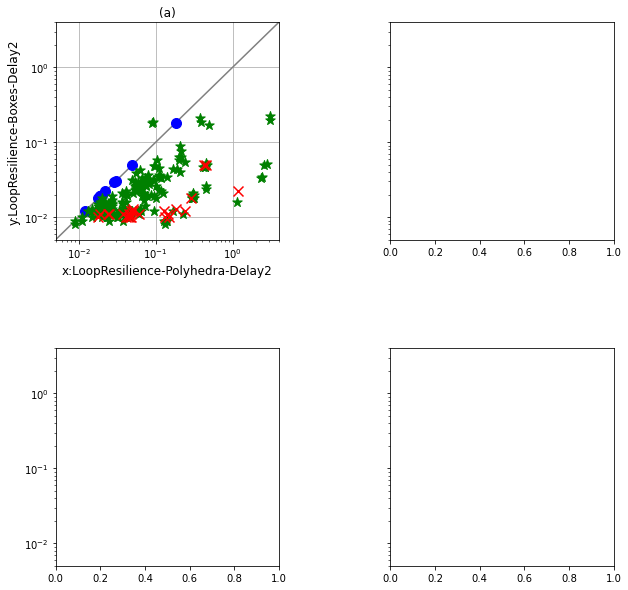

In [9]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
# Get all combinations of length 2 (or any length you want)
def cmp_dataframe(opt1,opt2):
    files = list(dict.fromkeys(df['filename']))
    # je veux comparer les options: j'ai chaque pair d'options, je réccup la valeur pour l'une et pour l'autre et je compare.
    # 
    cmp=pd.DataFrame(columns=['filename','option1','option2','precision','time1','time2'])
    grp=df.groupby(['options','filename']).max("time")
    for fname in files:
        q=f"filename=='{fname}'"
        grpquery= grp.query(q)
        q1 = f"options=='{opt1}'"
        q2 = f"options=='{opt2}'"
        time1 = grpquery.query(q1)["time"].values
        time2 = grpquery.query(q2)["time"].values
        if (grpquery.query(q1)["result"].values[0] > grpquery.query(q2)["result"].values[0]):    
            tmp=pd.DataFrame([[fname,opt1,opt2,0,time1,time2]], columns=['filename','option1','option2','precision','time1','time2'])
            cmp = pd.concat([cmp,tmp])
        elif (grpquery.query(q1)["result"].values[0] == grpquery.query(q2)["result"].values[0]):    
            tmp =pd.DataFrame([[fname,opt1,opt2,1,time1,time2]], columns=['filename','option1','option2','precision','time1','time2'])
            cmp = pd.concat([cmp,tmp])
        else:
            tmp =pd.DataFrame([[fname,opt1,opt2,2,time2,time2]], columns=['filename','option1','option2','precision','time1','time2'])
            cmp = pd.concat([cmp,tmp])

    return cmp
fig,axs = plt.subplots(2,2,sharey=True,figsize=(10,10))
fig.subplots_adjust(wspace=0.5,hspace=0.5)
def print_plot(plt,cmp):
    # Plot
    L=len(cmp["filename"])
    #plt.fig(figsize=(10,10))
    # Plot points for category A
    x_min = 0.005
    x_max = 4
    y_min = 0.005
    y_max = 4
    
    epsilon = 0.0001
    
    s = 100
    category_a =  cmp.query("precision == 2")    
    x=category_a['time1'].apply(lambda x: x if x < x_max else x_max-epsilon)
    y=category_a['time2'].apply(lambda x: x if x < y_max else y_max-epsilon)
    plt.scatter(x, y,color='blue', label='opt2 more precise than opt1', marker='o',zorder=10,s=s)

    
    category_c =  cmp.query("precision == 1")
    x=category_c['time1'].apply(lambda x: x if x < x_max else x_max-epsilon)
    y=category_c['time2'].apply(lambda x: x if x < y_max else y_max-epsilon)
    plt.scatter(x, y,color='green', label='opt1=opt2', marker='*',zorder=10,s=s)

    # Plot points for category B
    
    
    category_b =  cmp.query("precision == 0")
    x=category_b['time1'].apply(lambda x: x if x < x_max else x_max-epsilon)
    y=category_b['time2'].apply(lambda x: x if x < y_max else y_max-epsilon)
    plt.scatter(x, y, color='red', label='opt1 more precise than opt2 ', marker='x',zorder=10,s=s)
    
    
    plt.set_yscale('log')
    plt.set_xscale('log')
    
    plt.set_xlim(x_min, x_max)
    plt.set_ylim(y_min, y_max)
    # Labels and legend
    
    
    #plt.legend()
    plt.grid(True)
    yx = np.linspace(0,5,100)  # Generates 100 points between 0 and 10
    # Show the plot
    
    l = plt.plot(yx,yx,color='gray')
    
    
print_plot(axs[0][0],cmp_dataframe("-domain polyhedra -refine -resilience",  "-domain boxes -refine -resilience"))
axs[0][0].title.set_text('(a)')
axs[0][0].set_xlabel('''x:LoopResilience-Polyhedra-Delay2''',fontsize=12)
axs[0][0].set_ylabel("y:LoopResilience-Boxes-Delay2",fontsize=12)
    
#print_plot(axs[0][1],cmp_dataframe("-domain polyhedra -ordinals 3  -refine -resilience",  "-domain boxes -ordinals 3  -refine -resilience"))
#axs[0][1].title.set_text('(b)')
#axs[0][1].set_xlabel('''x:LoopResilience-Polyhedra-Lex-Delay2''',fontsize=12)
#axs[0][1].set_ylabel("y:LoopResilience-Boxes-Lex-Delay2",fontsize=12)


#print_plot(axs[1][0],cmp_dataframe("-domain polyhedra -joinbwd 5 -ordinals 3  -refine -resilience",  "-domain polyhedra -ordinals 3  -refine -resilience"))
#axs[1][0].title.set_text('(c)')
#axs[1][0].set_xlabel('x:LoopResilience-Polyhedra-Lex-Delay5',fontsize=12)
#"axs[1][0].set_ylabel("y:LoopResilience-Polyhedra-Lex-Delay2",fontsize=12)


#print_plot(axs[1][1],cmp_dataframe("-domain polyhedra -joinbwd 8 -ordinals 3  -refine -resilience",  "-domain polyhedra -joinbwd 5 -ordinals 3  -refine -resilience"))
#axs[1][1].title.set_text('(d)')
#axs[1][1].set_xlabel('x:LoopResilience-Polyhedra-Lex-Delay8',fontsize=12)
#axs[1][1].set_ylabel("y:LoopResilience-Polyhedra-Lex-Delay5",fontsize=12)

fig.savefig('cmppolyhedraboxesmulti.svg')

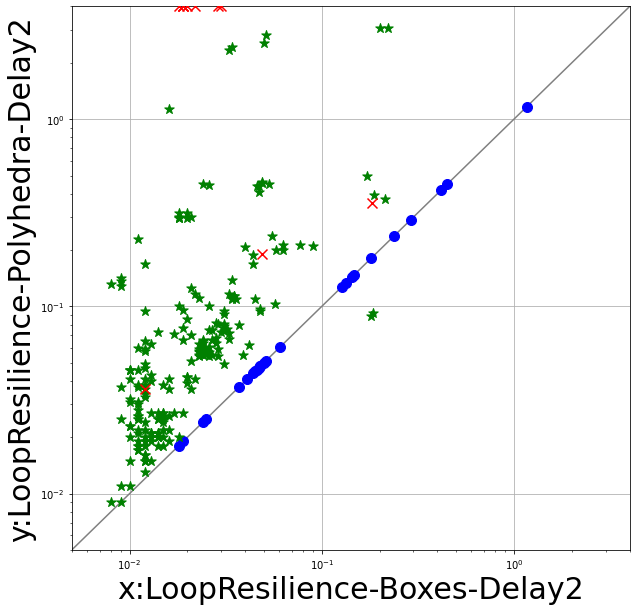

In [14]:
fig,axs = plt.subplots(1,1,sharey=True,figsize=(10,10))
fig.subplots_adjust(wspace=0.5,hspace=0.5)
axs.set_xlabel("x:LoopResilience-Boxes-Delay2",fontsize=30)
axs.set_ylabel("y:LoopResilience-Polyhedra-Delay2",fontsize=30)
print_plot(axs,cmp_dataframe("-domain boxes -refine -resilience","-domain polyhedra -refine -resilience"))
fig.savefig('cmppolyhedraboxesmultiA.svg')

In [11]:
cmp_dataframe("-domain polyhedra -joinbwd 8 -ordinals 3  -refine -resilience",  "-domain polyhedra -joinbwd 5 -ordinals 3  -refine -resilience").query("filename=='trm_svcomp_Lcm_false-termination-inputrand.c'")

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# Compare polyhedra and boxes with ord 3
cmp_dataframe("-domain polyhedra -ordinals 3  -refine -resilience",  "-domain boxes -ordinals 3  -refine -resilience").query("precision == 2")

In [ ]:
cmp_dataframe("-domain polyhedra -ordinals 3  -refine -resilience",  "-domain boxes -ordinals 3  -refine -resilience").query("precision == 0").shape[0]

In [ ]:
# Compare polyhedra and boxes with ord 3 and widening delay 5
cmp_dataframe("-domain polyhedra -joinbwd 8 -ordinals 3  -refine -resilience",  "-domain boxes -ordinals 3  -refine -resilience").query("precision == 2")


In [30]:
cmp_dataframe("-domain polyhedra -joinbwd 8 -ordinals 3  -refine -resilience",  "-domain boxes -ordinals 3  -refine -resilience").query("precision == 0").shape[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [31]:
cmp_dataframe("-domain polyhedra -joinbwd 8 -ordinals 3  -refine -resilience",  "-domain boxes -joinbwd 8 -ordinals 3  -refine -resilience").query("precision == 2")

IndexError: index 0 is out of bounds for axis 0 with size 0

In [32]:
# Compare polyhedra with ord 3 and without
cmp_dataframe("-domain polyhedra -ordinals 3  -refine -resilience","-domain polyhedra -refine -resilience").query("precision == 1")

IndexError: index 0 is out of bounds for axis 0 with size 0

In [33]:
# Compare polyhedra with ord 3 and with ord 3 + delay 5
cmp_dataframe("-domain polyhedra -ordinals 3  -refine -resilience","-domain polyhedra -joinbwd 5 -ordinals 3  -refine -resilience").query("precision == 1")



IndexError: index 0 is out of bounds for axis 0 with size 0

In [34]:
# Compare BOXES with ord 3 and  boxes with ord 3 + delay 5
cmp_dataframe("-domain boxes -ordinals 3  -refine -resilience","-domain boxes -joinbwd 5 -ordinals 3  -refine -resilience" ).query("precision == 1")

IndexError: index 0 is out of bounds for axis 0 with size 0

In [35]:
# Compare polyhedra with ord 3 and with ord 3 + delay 5
cmp_dataframe("-domain polyhedra -ordinals 3  -refine -resilience","-domain polyhedra -joinbwd 8 -refine -resilience").query("precision == 1")


IndexError: index 0 is out of bounds for axis 0 with size 0

In [36]:
# Compare polyhedra with ord 3 and with ord 3 + delay 8
cmp_dataframe("-domain polyhedra -ordinals 3  -refine -resilience","-domain polyhedra -joinbwd 8 -refine -resilience").query("precision == 1")


IndexError: index 0 is out of bounds for axis 0 with size 0

In [37]:
cmp_dataframe("-domain polyhedra -joinbwd 8 -refine -resilience","-domain polyhedra -ordinals 3  -refine -resilience").query("precision == 2")

IndexError: index 0 is out of bounds for axis 0 with size 0

,filename,option1,option2,precision,time1,time2
0,Adding_Subtracting_Zero_1_NT_combination_1.c,-domain polyhedra -refine -resilience,UAutomizer,0,[0.052],[4.354]
0,Adding_Subtracting_Zero_2_NT_combination_1.c,-domain polyhedra -refine -resilience,UAutomizer,0,[0.375],[5.01]
0,Adding_Subtracting_Zero_2_NT_combination_2.c,-domain polyhedra -refine -resilience,UAutomizer,0,[0.295],[5.009]
0,Adding_Subtracting_Zero_2_NT_combination_3.c,-domain polyhedra -refine -resilience,UAutomizer,0,[0.288],[5.009]
0,Adding_Subtracting_Zero_2_NT_combination_4.c,-domain polyhedra -refine -resilience,UAutomizer,0,[0.327],[5.01]
0,Adding_Subtracting_Zero_2_NT_combination_5.c,-domain polyhedra -refine -resilience,UAutomizer,0,[0.318],[5.01]
0,Adding_Subtracting_Zero_2_NT_combination_6.c,-domain polyhedra -refine -resilience,UAutomizer,0,[0.412],[5.012]
0,Adding_Subtracting_Zero_2_NT_combination_7.c,-domain polyhedra -refine -resilience,UAutomizer,0,[0.383],[5.013]
0,Adding_Subtracting_Zero_2_NT_combination_8.c,-domain polyhedra -refine -resilience,UAutomizer,0,[0.419],[5.011]
0,Incorrect_Initialization_4_NT_combination_1.c,-domain polyhedra -refine -resilience,UAutomizer,0,[0.263],[4.936]


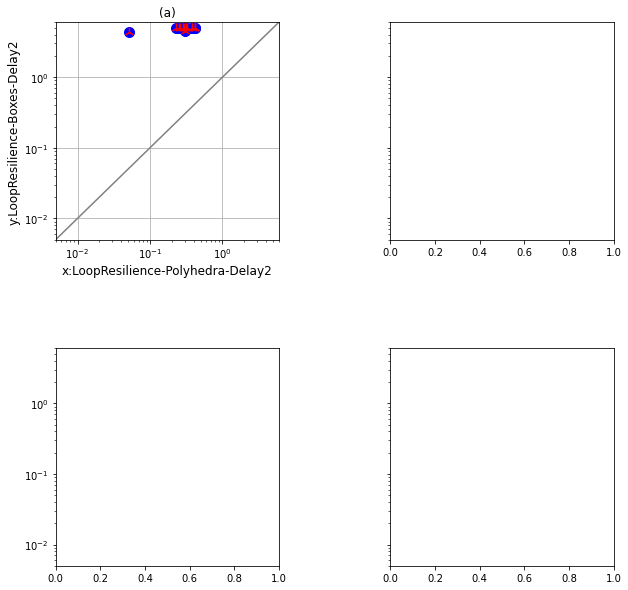

In [52]:
def cmp_dataframe_wf(opt1,opt2):
    files = list(dict.fromkeys(df['filename']))
    # je veux comparer les options: j'ai chaque pair d'options, je réccup la valeur pour l'une et pour l'autre et je compare.
    #  ATTENTION BUG AVEC EMPTY LIST DANS QUERY1 2
    cmp=pd.DataFrame(columns=['filename','option1','option2','precision','time1','time2'])
    grp=tmpu.groupby(['options','filename']).max("time")
    for fname in files:
        q=f"filename=='{fname}'"
        grpquery= grp.query(q)
        q1 = f"options=='{opt1}'"
        q2 = f"options=='{opt2}'"             
        time1 = grpquery.query(q1)["time"].values
        time2 = grpquery.query(q2)["time"].values
        if( len(grpquery.query(q1)["result"].values) == 0 or len(grpquery.query(q2)["result"].values) == 0):
            break
        if (grpquery.query(q1)["result"].values[0] > grpquery.query(q2)["result"].values[0]):    
            tmp=pd.DataFrame([[fname,opt1,opt2,0,time1,time2]], columns=['filename','option1','option2','precision','time1','time2'])
            cmp = pd.concat([cmp,tmp])
        elif (grpquery.query(q1)["result"].values[0] == grpquery.query(q2)["result"].values[0]):    
            tmp =pd.DataFrame([[fname,opt1,opt2,1,time1,time2]], columns=['filename','option1','option2','precision','time1','time2'])
            cmp = pd.concat([cmp,tmp])
        else:
            tmp =pd.DataFrame([[fname,opt1,opt2,2,time2,time2]], columns=['filename','option1','option2','precision','time1','time2'])
            cmp = pd.concat([cmp,tmp])

    return cmp

fig,axs = plt.subplots(2,2,sharey=True,figsize=(10,10))
fig.subplots_adjust(wspace=0.5,hspace=0.5)
def print_plot_wf(plt,cmp):
    # Plot
    L=len(cmp["filename"])
    #plt.fig(figsize=(10,10))
    # Plot points for category A
    x_min = 0.005
    x_max = 6
    y_min = 0.005
    y_max = 6
    
    epsilon = 0.0001
    
    s = 100
    category_a =  cmp.query("precision == 2")    
    x=category_a['time1'].apply(lambda x: x if x < x_max else x_max-epsilon)
    y=category_a['time2'].apply(lambda x: x if x < y_max else y_max-epsilon)
    plt.scatter(x, y,color='red', label='opt2 more precise than opt1', marker='2',zorder=10,s=s)

    
    category_c =  cmp.query("precision == 1")
    x=category_c['time1'].apply(lambda x: x if x < x_max else x_max-epsilon)
    y=category_c['time2'].apply(lambda x: x if x < y_max else y_max-epsilon)
    plt.scatter(x, y,color='green', label='opt1=opt2', marker='o',zorder=10,s=s)

    
    category_c =  cmp.query("precision == 0")
    x=category_c['time1'].apply(lambda x: x if x < x_max else x_max-epsilon)
    y=category_c['time2'].apply(lambda x: x if x < y_max else y_max-epsilon)
    plt.scatter(x, y,color='blue', label='opt1 is more precise than opt2', marker='o',zorder=10,s=s)
    # Plot points for category B
    
    
    category_b =  cmp.query("precision == 0")
    x=category_b['time1'].apply(lambda x: x if x < x_max else x_max-epsilon)
    y=category_b['time2'].apply(lambda x: x if x < y_max else y_max-epsilon)
    plt.scatter(x, y, color='red', label='opt1 more precise than opt2 ', marker='2',zorder=10,s=s)
    
    
    plt.set_yscale('log')
    plt.set_xscale('log')
    
    plt.set_xlim(x_min, x_max)
    plt.set_ylim(y_min, y_max)
    # Labels and legend
    
    
    #plt.legend()
    plt.grid(True)
    yx = np.linspace(0,6,100)  # Generates 100 points between 0 and 10
    # Show the plot
    
    l = plt.plot(yx,yx,color='gray')

print_plot_wf(axs[0][0],cmp_dataframe_wf("-domain polyhedra -refine -resilience",  "UAutomizer"))
axs[0][0].title.set_text('(a)')
axs[0][0].set_xlabel('''x:LoopResilience-Polyhedra-Delay2''',fontsize=12)
axs[0][0].set_ylabel("y:LoopResilience-Boxes-Delay2",fontsize=12)
cmp_dataframe_wf("-domain polyhedra -refine -resilience",  "UAutomizer")